# Aula 5 - Regressão Linear e Intervalos de Confiança

## Regressão Linear
- Análise usada para prever o valor de uma variável X (dependente) com base no valor de outra Y (independente).
- Estima os coeficientes da equação linear, envolvendo uma ou mais variáveis independentes que melhor preveem o valor da variável dependente.
- Se ajusta a uma linha reta ou superficial que minimiza as discrepâncias entre os valores de saída previstos e reais.
- Há calculadoras de regressão linear simples que usam um método dos mínimos quadrados para descobrir a linha de melhor ajuste para um conjunto de dados emparelhados. 

Neste capítulo, trabalharemos novamente na investigação dos efeitos de concussões relacionadas ao esporte. Os dados são baseados na ferramenta de avaliação [IMPACT](http://www.impacttest.com).

A ferramenta IMPACT tem seis métricas primárias, sendo elas:

- Memória Verbal
- Memória Visual
- Velocidade visual motora
- Tempo de Reação
- Controle de Impulso
- Nota total do sintoma

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [4]:
impact = pd.read_csv('../data/impact.csv')

In [5]:
impact.head()

,subject,condition,verbal_memory_baseline,visual_memory_baseline,visual-motor_speed_baseline,reaction_time_baseline,impulse_control_baseline,total_symptom_baseline,verbal_memory_retest,visual_memory_retest,visual-motor_speed_retest,reaction_time_retest,impulse_control_retest,total_symptom_retest
0,1,control,95,88,35.29,0.42,11,0,97,86,35.61,0.65,10,0
1,2,control,90,82,31.47,0.63,7,0,86,80,37.01,0.49,7,0
2,3,control,87,77,30.87,0.56,8,0,90,79,20.15,0.75,9,0
3,4,control,84,72,41.87,0.66,7,0,85,70,33.26,0.19,8,0
4,5,control,92,77,33.28,0.56,7,1,87,77,28.34,0.59,8,1


In [6]:
impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject                      40 non-null     int64  
 1   condition                    40 non-null     object 
 2   verbal_memory_baseline       40 non-null     int64  
 3   visual_memory_baseline       40 non-null     int64  
 4   visual-motor_speed_baseline  40 non-null     float64
 5   reaction_time_baseline       40 non-null     float64
 6   impulse_control_baseline     40 non-null     int64  
 7   total_symptom_baseline       40 non-null     int64  
 8   verbal_memory_retest         40 non-null     int64  
 9   visual_memory_retest         40 non-null     int64  
 10  visual-motor_speed_retest    40 non-null     float64
 11  reaction_time_retest         40 non-null     float64
 12  impulse_control_retest       40 non-null     int64  
 13  total_symptom_retest  

/tmp/ipykernel_32961/2311936939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(impact.corr(), vmin=-1, vmax=1, annot=True)


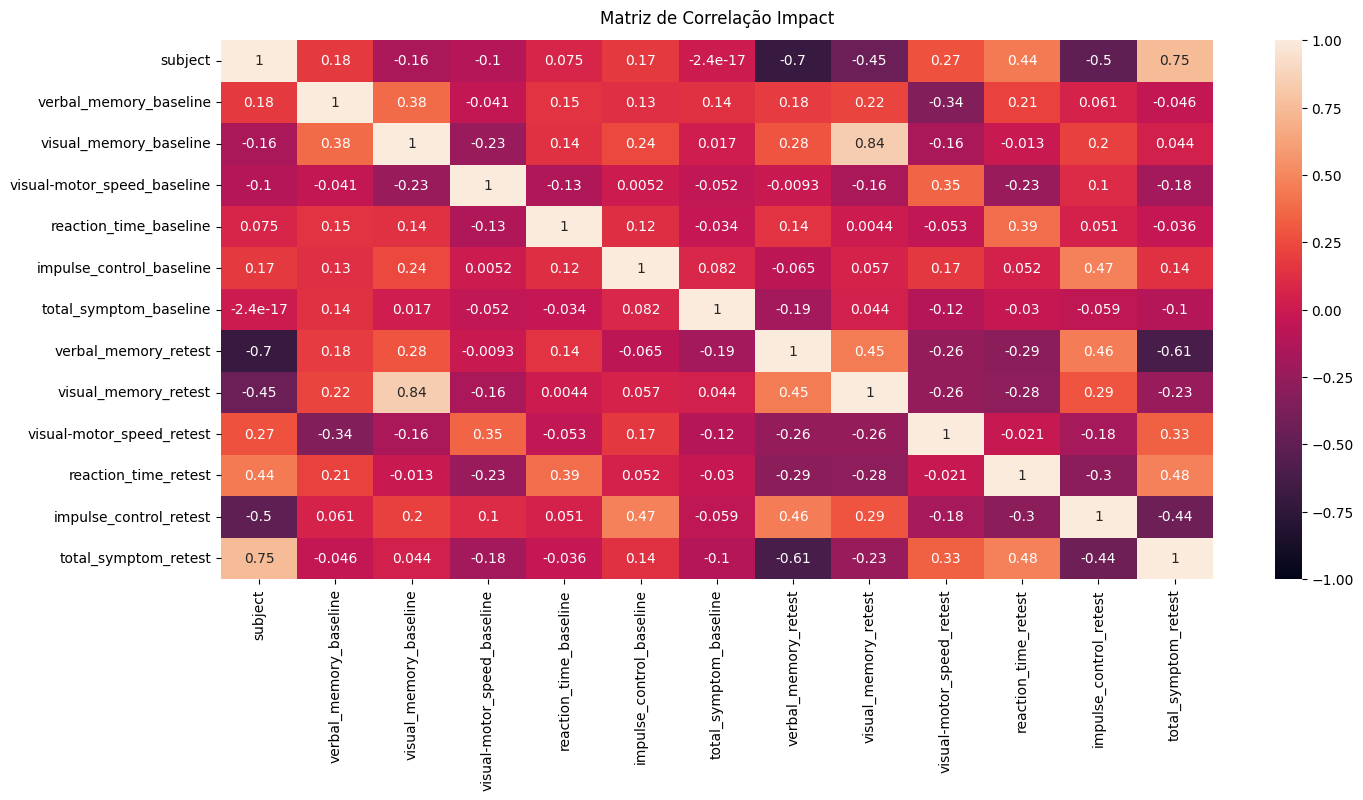

In [7]:
plt.figure(figsize=(16,7))
heatmap = sns.heatmap(impact.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Matriz de Correlação Impact', fontdict={'fontsize':12}, pad=12)
plt.show()

### Premissas
- Variáveis numéricas contínuas; 
- Relacionamento linear entre as variáveis (ver: gráfico de dispersão);
- Observações independentes (com reposição amostral).
- Tratamento de dados discrepantes (outliers).  
- Homoscedasticidade: as variações ao longo da linha de regressão linear de melhor ajuste permaneçam semelhantes por toda a linha.
- Resíduos (erros) da linha de regressão de melhor ajuste seguem a distribuição normal.

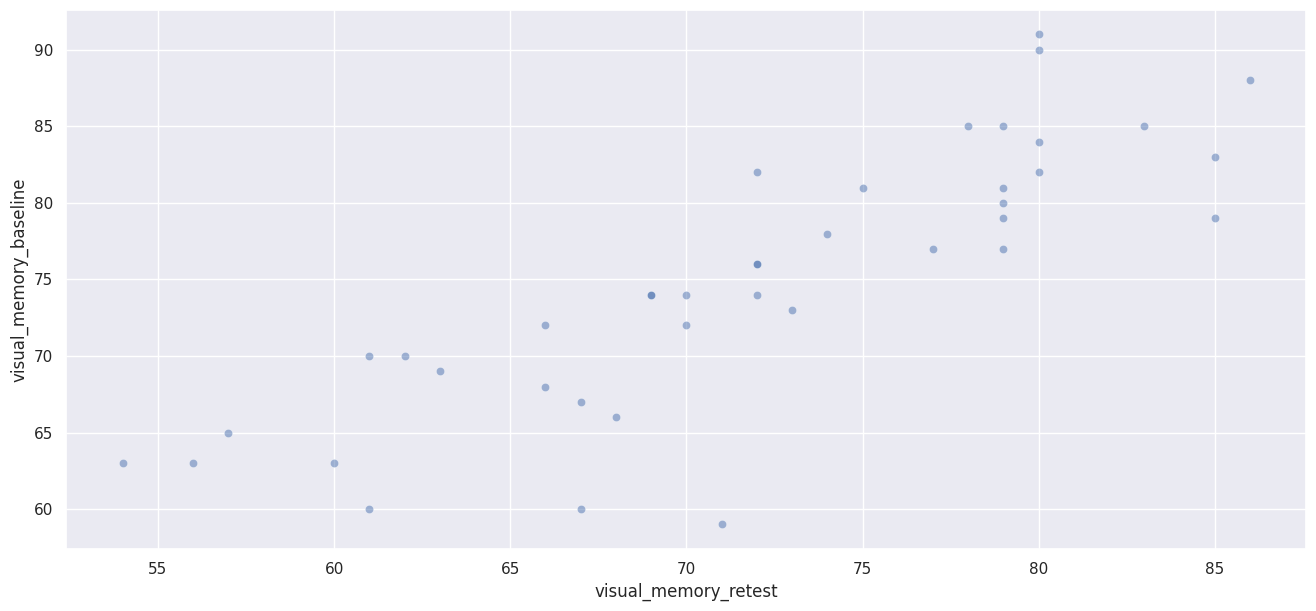

In [8]:
plt.figure(figsize=(16,7))
sns.set_theme(style='darkgrid')
ax = sns.scatterplot(data=impact, x='visual_memory_retest', y='visual_memory_baseline', alpha=0.5)
plt.show()

## Intervalos de Confiança

A lógica de intervalos de confiança é a de reportar uma amplitude de valores, ao invés de um único valor.
Ou seja, reportar um intervalo estimado, ao invés de uma estimativa pontual. 

- **Intervalo de confiança:** a estimativa de um intervalo de um parâmetro de uma população, baseado em uma amostra randômica.
- **Grau de confiança (ex.: 95%)** representa a probabilidade de que o intervalo apresentado seja representativo do parâmetro real da população.

In [11]:
linregress(x=impact['visual_memory_retest'], y=impact['visual_memory_baseline'])

LinregressResult(slope=0.8568796068796066, intercept=13.265356265356282, rvalue=0.8393548547081894, pvalue=1.3210800446053523e-11, stderr=0.09002206405778451, intercept_stderr=6.515756947878915)

In [15]:
linregress(x=impact_concussed['visual_memory_retest'], y=impact_concussed['visual_memory_baseline'])

LinregressResult(slope=0.891089108910891, intercept=13.086633663366342, rvalue=0.9293254639671066, pvalue=3.2266616842112163e-09, stderr=0.08345479162877428, intercept_stderr=5.815128443469078)

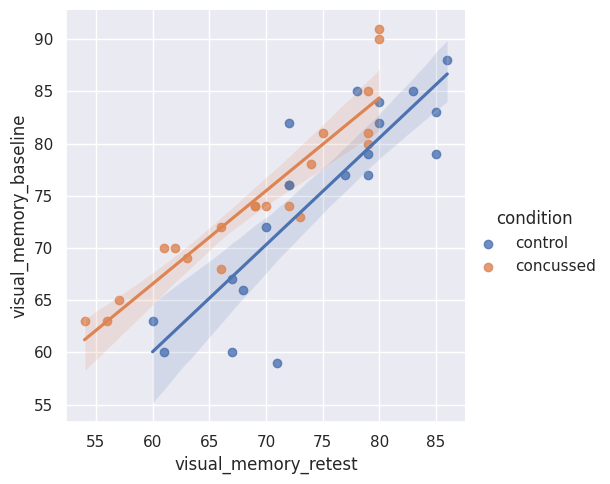

In [12]:
sns.lmplot(data=impact, x='visual_memory_retest', y='visual_memory_baseline', hue='condition')

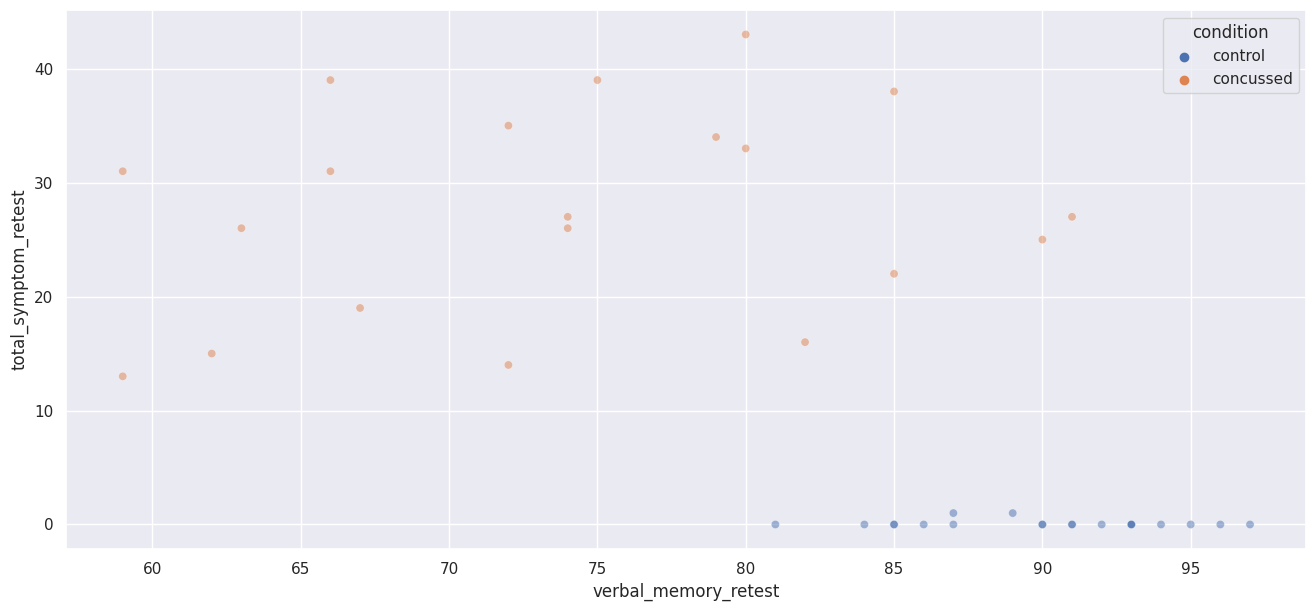

In [13]:
plt.figure(figsize=(16,7))
sns.set_theme(style='darkgrid')
ax = sns.scatterplot(data=impact, x='verbal_memory_retest', y='total_symptom_retest', hue='condition', alpha=0.5)
plt.show()

In [14]:
impact_concussed = impact[impact['condition'] == 'concussed']
print(impact_concussed)

    subject  condition  verbal_memory_baseline  visual_memory_baseline  \
20       21  concussed                      79                      81   
21       22  concussed                      85                      85   
22       23  concussed                      97                      91   
23       24  concussed                      89                      74   
24       25  concussed                      75                      63   
25       26  concussed                      75                      68   
26       27  concussed                      84                      78   
27       28  concussed                      93                      74   
28       29  concussed                      88                      80   
29       30  concussed                      97                      73   
30       31  concussed                      93                      74   
31       32  concussed                      96                      70   
32       33  concussed                

In [16]:
linregress(x=impact_concussed['verbal_memory_retest'], y=impact_concussed['total_symptom_retest'])

LinregressResult(slope=0.19868033208036986, intercept=12.93772140944861, rvalue=0.21612275702467784, pvalue=0.3600981770015481, stderr=0.2115586862814397, intercept_stderr=15.797428649083118)

<Figure size 1600x700 with 0 Axes>

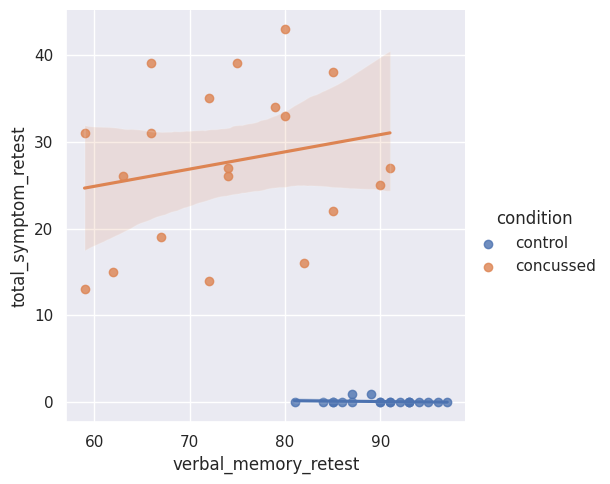

In [17]:
plt.figure(figsize=(16,7))
sns.set_theme(style='darkgrid')
sns.lmplot(data=impact, x='verbal_memory_retest', y='total_symptom_retest', hue='condition')
plt.show()

<Figure size 1600x700 with 0 Axes>

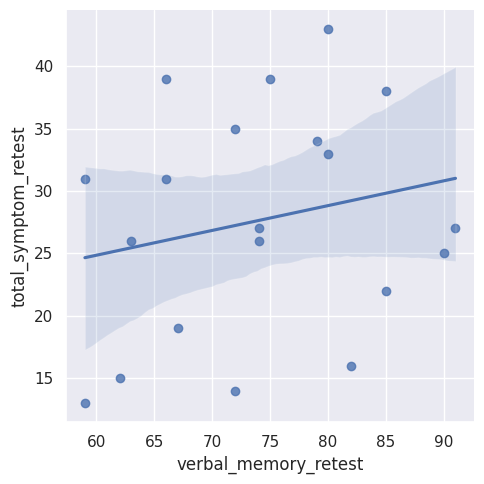

In [18]:
plt.figure(figsize=(16,7))
sns.set_theme(style='darkgrid')
sns.lmplot(data=impact_concussed, x='verbal_memory_retest', y='total_symptom_retest')
plt.show()